# Exercice 1 : Evaluate the clustering quality with metrics

### Define the function to compute the metrics (Jaccard, Rand Statistic, Fowlkes Mallow)

In [1]:
from math import sqrt

def jaccard_coeff(FP,FN,TP):
    """
    In order to compute the Jaccard coefficient -> The closest it gets from 1, the better it is. 
        @ FP : False Positive
        @ FN : False Negative
        @ TP : True Positive
    """
    return TP/(TP+FN+FP)

def rand_statistic(TN,TP,N):
    """
    In order to compute the Random Statistic coefficient -> The closest it gets from 1, the better it is. 
        @ TN : True Negative
        @ TP : True Positive
        @ N : number of samples
    """
    return (TP+TN)/N

def fowlkes_mallow(TP,FN,FP):
    """
    In order to compute the Fowlkes-Mallow measure -> The smallest it is, the better it gets
        @ FN : False Negative
        @ FP : False Positive
        @ TP : True Positive
    """
    return TP/sqrt((TP+FN)*(TP+FP))

## Load the data from the xlsx file

In [2]:
import pandas as pd 
from pandas import read_excel

sheet_algo_A = 'Algorithme_A' 
sheet_algo_B = 'Algorithme_B' 

file_name = 'data_clustering.xlsx'
df_algo_A = read_excel(file_name, sheet_name = sheet_algo_A)
df_algo_B = read_excel(file_name, sheet_name = sheet_algo_B)
print("Data for algorithm A : ")
display(df_algo_A)
print("Data for algorithm B : ")
display(df_algo_B)

Data for algorithm A : 


,T1,T2,S
0,8,3,11
1,1,6,7
2,9,9,18


Data for algorithm B : 


,T1,T2,S
0,7,2,9
1,2,7,9
2,9,9,18


## Get the value of all metrics for both algorithms

In [3]:
import math

def getbinomialcoef(a,b):
    if b == 1 or a == b:
        return 1
    if b > a:
        print("Error ... the 2nd number is higher than the 1st.")
        return 0   
    else:
        fact_a = math.factorial(a)
        fact_b = math.factorial(b)
        fact_ab = math.factorial(a-b)
        div = fact_a // (fact_b*fact_ab)
        return div

### Algorithme A

In [14]:
TruePositive = getbinomialcoef(8,2) + getbinomialcoef(3,2) + getbinomialcoef(6,2) + getbinomialcoef(1,2)
FalseNegative = getbinomialcoef(9,2) + getbinomialcoef(9,2) - TruePositive
FalsePositive = getbinomialcoef(11,2) + getbinomialcoef(7,2) - TruePositive
TrueNegative = getbinomialcoef(18,2) - TruePositive - FalsePositive - FalseNegative
print("TruePositive = ",TruePositive)
print("FalsePositive = ",FalsePositive)
print("FalseNegative = ",FalseNegative)
print("TrueNegative = ",TrueNegative)
jaccard = jaccard_coeff(FalsePositive,FalseNegative,TruePositive)
randstatistic = rand_statistic(TrueNegative,TruePositive,(TruePositive+FalseNegative+FalsePositive+TrueNegative))
fowlkes_mallow = fowlkes_mallow(TruePositive,FalseNegative,FalsePositive)
print("Jaccard = ",jaccard)
print("Rand Statistic = ",randstatistic)
print("fowlkes_mallow = ",fowlkes_mallow)

Error ... the 2nd number is higher than the 1st.
TruePositive =  46
FalsePositive =  30
FalseNegative =  26
TrueNegative =  51
Jaccard =  0.45098039215686275
Rand Statistic =  0.6339869281045751
fowlkes_mallow =  0.6218487810012564


### Algorithme B

In [4]:
TruePositive = getbinomialcoef(7,2) + getbinomialcoef(2,2) + getbinomialcoef(7,2) + getbinomialcoef(2,2)
FalsePositive = getbinomialcoef(9,2) + getbinomialcoef(9,2) - TruePositive
FalseNegative = getbinomialcoef(9,2) + getbinomialcoef(9,2) - TruePositive
TrueNegative = getbinomialcoef(18,2) - TruePositive - FalsePositive - FalseNegative
print("TruePositive = ",TruePositive)
print("FalsePositive = ",FalsePositive)
print("FalseNegative = ",FalseNegative)
print("TrueNegative = ",TrueNegative)
jaccard = jaccard_coeff(FalsePositive,FalseNegative,TruePositive)
randstatistic = rand_statistic(TrueNegative,TruePositive,(TruePositive+FalseNegative+FalsePositive+TrueNegative))
fowlkes_mallow = fowlkes_mallow(TruePositive,FalseNegative,FalsePositive)
print("Jaccard = ",jaccard)
print("Rand Statistic = ",randstatistic)
print("fowlkes_mallow = ",fowlkes_mallow)

TruePositive =  44
FalsePositive =  28
FalseNegative =  28
TrueNegative =  53
Jaccard =  0.44
Rand Statistic =  0.6339869281045751
fowlkes_mallow =  0.6111111111111112


# Exercice 2 : Clustering

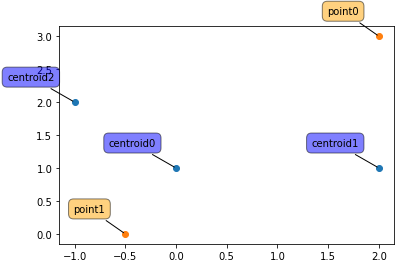

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

labels = ['centroid{0}'.format(i) for i in range(3)]
points = ['point{0}'.format(i) for i in range(2)]


centroid1 = [0,1]
centroid2 = [2,1]
centroid3 = [-1,2]
p1 = [2,3]
p2 = [-0.5,0]


data = [centroid1,centroid2,centroid3,p1,p2]
df_points = pd.DataFrame(columns=["X","Y"],data=data)
df_points['X'] = df_points['X'].astype(dtype=np.float64)
df_points['Y'] = df_points['Y'].astype(dtype=np.float64)

plt.scatter(df_points.iloc[0:3,0],df_points.iloc[0:3,1])
plt.scatter(df_points.iloc[3:5,0],df_points.iloc[3:5,1])

for label, x, y in zip(labels, df_points.iloc[0:3, 0], df_points.iloc[0:3, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='right', va='bottom',bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.5),arrowprops=dict(arrowstyle = '-', connectionstyle='arc3,rad=0'))

for label, x, y in zip(points, df_points.iloc[3:5, 0], df_points.iloc[3:5, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='right', va='bottom',bbox=dict(boxstyle='round,pad=0.5', fc='ORANGE', alpha=0.5),arrowprops=dict(arrowstyle = '-', connectionstyle='arc3,rad=0'))
 
plt.show()

In [84]:
def distance(x1,x2,y1,y2):
    return sqrt((x1-x2)**2 + (y1-y2)**2)

In [86]:
print("Point 1 : ")
print(distance(-0.5,0,0,1))
print(distance(-0.5,2,0,1))
print(distance(-0.5,-1,0,2))
print("Point 2 : ")
print(distance(2,0,3,1))
print(distance(2,2,3,1))
print(distance(2,-1,3,2))

Point 1 : 
1.118033988749895
2.692582403567252
2.0615528128088303
Point 2 : 
2.8284271247461903
2.0
3.1622776601683795
